<h1>Country Safety Index Building<h1>

## Imports

In [597]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import plotly.express as px
import plotly.io as pio



## Dataset Building

#### Country GDP Data

In [598]:

# Country GDP Data
country_gdp_data = pd.read_csv("./data/country_gdp_data.csv")
gdp_2023 = country_gdp_data[["Country Name", "2023"]]
gdp_2023.rename(columns={"Country Name": "Country", "2023": "GDP 2023"}, inplace=True)

gdp_2023.head()


C:\Users\JasNj\AppData\Local\Temp\ipykernel_63092\2240267767.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,GDP 2023
0,Aruba,3.648573e+09
1,Africa Eastern and Southern,1.245470e+12
2,Afghanistan,1.723305e+10
3,Africa Western and Central,7.991060e+11
4,Angola,8.482465e+10


#### Country Corruption, Burgalary and Theft Data

In [599]:
# Country Corruption, Burgalary and Theft Data
country_crime_data = pd.read_excel("./data/data_cts_corruption_and_economic_crime.xlsx")
crime_data_2021 = country_crime_data[["Country", "Category", "Year", "Unit of measurement", "VALUE", "Dimension", "Sex", "Age"]]


filtered = crime_data_2021[
    (crime_data_2021["Year"] == 2021) &
    (crime_data_2021["Unit of measurement"] == "Counts") &
    (crime_data_2021["Age"] == "Total") &
    (crime_data_2021["Sex"] == "Total") 
]

corruption_data_2021 = filtered[filtered["Category"] == "Corruption"][["Country", "VALUE"]].rename(columns={"VALUE": "Corruption"})
burglary_data_2021   = filtered[filtered["Category"] == "Burglary"][["Country", "VALUE"]].rename(columns={"VALUE": "Burglary"})
theft_data_2021      = filtered[filtered["Category"] == "Theft"][["Country", "VALUE"]].rename(columns={"VALUE": "Theft"})

print(corruption_data_2021.head())
print("")
print(burglary_data_2021.head())
print("")
print(theft_data_2021.head())


                  Country  Corruption
494               Albania       977.0
495  United Arab Emirates        84.0
496               Austria      2915.0
497            Azerbaijan       458.0
498               Belgium      4706.0

        Country  Burglary
4008    Albania     746.0
4009  Australia  139088.0
4010    Austria   40385.0
4011   Bulgaria    4134.0
4012    Bahamas      81.0

        Country     Theft
5893    Albania    3342.0
5894  Argentina  266920.0
5895  Australia  492210.0
5896    Austria   73213.0
5897   Bulgaria   24435.0


#### Intentional Homocide

In [600]:
# Intentional Homocide Data

homocide_data = pd.read_excel("./data/data_cts_intentional_homicide.xlsx")
homocide_data.head()

homocide_data_2021 = homocide_data[["Country", "Indicator", "Year", "Unit of measurement", "VALUE", "Dimension", "Sex", "Age", "Category"]]

filtered = homocide_data_2021[
    (homocide_data_2021["Year"] == 2021) &
    (homocide_data_2021["Unit of measurement"] == "Counts") &
    (homocide_data_2021["Indicator"] == "Victims of intentional homicide") &
    (homocide_data_2021["Dimension"] == "Total") &
    (homocide_data_2021["Age"] == "Total") &
    (homocide_data_2021["Sex"] == "Total") &
    (homocide_data_2021["Category"] == "Total")
]

homocide_data_2021 = filtered[["Country", "VALUE"]].rename(columns={"VALUE": "Homicide"})
homocide_data_2021.head()



,Country,Homicide
5441,Afghanistan,1613.0
5442,Albania,66.0
5443,United Arab Emirates,44.0
5444,Argentina,2094.0
5445,Armenia,61.0


#### Kidnappings, Assault, Sexual Violence

In [601]:
# Country Kidnappings, Assualt and Sexual Violence Data

country_assault_data = pd.read_excel("./data/data_cts_violent_and_sexual_crime.xlsx")
assault_data_2021 = country_assault_data[["Country", "Category", "Indicator", "Year", "Age", "Sex", "Unit of measurement", "VALUE"]]

filtered = assault_data_2021[
    (assault_data_2021["Year"] == 2021) &
    (assault_data_2021["Unit of measurement"] == "Counts") &
    (assault_data_2021["Indicator"] == "Violent offences") &
    (assault_data_2021["Age"] == "Total") &
    (assault_data_2021["Sex"] == "Total")
]

kidnappings_data     = filtered[filtered["Category"] == "Kidnapping"][["Country", "VALUE"]].rename(columns={"VALUE": "Kidnapping"})
assault_data         = filtered[filtered["Category"] == "Serious assault"][["Country", "VALUE"]].rename(columns={"VALUE": "Serious Assault"})
sexual_violence_data = filtered[filtered["Category"] == "Sexual violence"][["Country", "VALUE"]].rename(columns={"VALUE": "Sexual Violence"})

print(kidnappings_data.head())
print("")
print(assault_data.head())
print("")
print(sexual_violence_data.head())

                   Country  Kidnapping
3635               Albania         4.0
3636  United Arab Emirates       141.0
3637             Argentina       111.0
3638             Australia       453.0
3639               Austria         3.0

                   Country  Serious Assault
1796               Albania            163.0
1797  United Arab Emirates            145.0
1798             Argentina         154197.0
1799             Australia          74916.0
1800               Austria           3610.0

         Country  Sexual Violence
5398     Albania            135.0
5399   Argentina          37867.0
5400   Australia          31118.0
5401     Austria           4354.0
5402  Azerbaijan             77.0


#### Gun Ownership

In [602]:
# Gun Ownership Data
gun_ownership_data = pd.read_csv("./data/gun-ownership-by-country-2025.csv")

gun_ownership_data = gun_ownership_data[["country", "GunOwnership_TotalCivilianFirearms_num_2017", "GunOwnership_MilitaryFirearms_num_2017", "GunOwnership_LawEnforcementFirearms_num_2017"]]
gun_ownership_data.rename(columns={"country": "Country"}, inplace=True)
gun_ownership_data.head()




,Country,GunOwnership_TotalCivilianFirearms_num_2017,GunOwnership_MilitaryFirearms_num_2017,GunOwnership_LawEnforcementFirearms_num_2017
0,United States,393347000,4535380.0,1016000.0
1,Falkland Islands,2000,NaN,30.0
2,Yemen,14859000,28500.0,NaN
3,New Caledonia,115000,NaN,700.0
4,Serbia,2719000,384422.0,53100.0


#### Military Data

In [603]:
military_data = pd.read_csv("./data/military.csv")

military_data = military_data[["Country", "Total"]]
military_data.rename(columns={"Total": "Military"}, inplace=True)
military_data.head()

,Country,Military
0,Afghanistan,495000
1,Albania,8000
2,Algeria,467200
3,Angola,117000
4,Antigua and Barbuda,260


#### Natural Disaster Data

In [604]:
natural_disaster_data = pd.read_csv("./data/natural-disaster-risk-by-country-2025.csv")

natural_disaster_data = natural_disaster_data[["country", "NaturalDisasterRisk_WorldRiskIndexTotal_2024"]]
natural_disaster_data.rename(columns={"country": "Country"}, inplace=True)
natural_disaster_data.head()

,Country,NaturalDisasterRisk_WorldRiskIndexTotal_2024
0,Philippines,46.91
1,Indonesia,41.13
2,India,40.96
3,Colombia,37.81
4,Mexico,35.93


#### Police Data

In [605]:
police_data = pd.read_csv("./data/police_wikipedia_per_country.csv")

police_data = police_data[["Country or dependency", "Active force"]]

police_data.rename(columns={"Active force": "Active Police Force"}, inplace=True)
police_data.rename(columns={"Country or dependency": "Country"}, inplace=True)

police_data.head()

,Country,Active Police Force
0,Algeria,160000
1,Albania,9900
2,American Samoa (US),200
3,Andorra,237
4,Antigua and Barbuda,600


#### Traffic Fatalities Data

In [606]:
traffic_data = pd.read_csv("./data/traffic_fatalities_per_100k.csv")

traffic_data = traffic_data[["GEO_NAME_SHORT", "RATE_PER_100000_N"]]

traffic_data.rename(columns={"GEO_NAME_SHORT": "Country", "RATE_PER_100000_N": "Traffic Fatalities per 100k"}, inplace=True)
traffic_data.head()

,Country,Traffic Fatalities per 100k
0,Tonga,8.5
1,Jamaica,17.8
2,Greece,7.3
3,Malawi,20.2
4,Bahrain,8.1


#### Youth Unemployement Data

In [607]:
youth_unemployment_data = pd.read_csv("./data/Youth unemployment rate (ages 15-24).csv")
youth_unemployment_data = youth_unemployment_data[["name", "%"]]
youth_unemployment_data.rename(columns={"name": "Country", "%": "Youth Unemployment Rate"}, inplace=True)

youth_unemployment_data.head()

,Country,Youth Unemployment Rate
0,Djibouti,76.5
1,Eswatini,65.0
2,Libya,49.4
3,South Africa,49.1
4,Kosovo,48.8


### Combining the data into one dataset

In [608]:
dfs = [
    gdp_2023,
    corruption_data_2021,
    burglary_data_2021,
    theft_data_2021,
    homocide_data_2021,
    kidnappings_data,
    assault_data,
    sexual_violence_data,
    gun_ownership_data,
    military_data,
    natural_disaster_data,
    police_data,
    traffic_data,
    youth_unemployment_data
]


combined_df = dfs[0]

for df in dfs[1:]:
    combined_df = pd.merge(combined_df, df, on="Country", how="outer")

#write to csv
combined_df.to_csv("country_safety_data.csv", index=False)
print("Combined DataFrame:")
combined_df.head()


Combined DataFrame:


,Country,GDP 2023,Corruption,Burglary,Theft,Homicide,Kidnapping,Serious Assault,Sexual Violence,GunOwnership_TotalCivilianFirearms_num_2017,GunOwnership_MilitaryFirearms_num_2017,GunOwnership_LawEnforcementFirearms_num_2017,Military,NaturalDisasterRisk_WorldRiskIndexTotal_2024,Active Police Force,Traffic Fatalities per 100k,Youth Unemployment Rate
0,Aruba,3.648573e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,NaN,700.0,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.245470e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1.723305e+10,NaN,NaN,NaN,1613.0,NaN,NaN,NaN,4270000.0,331170.0,239000.0,495000.0,4.12,NaN,24.1,18.1
3,Africa Western and Central,7.991060e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,8.482465e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2982000.0,203300.0,60000.0,117000.0,10.42,NaN,15.0,28.2


## Data Cleaning

A big issue I noted was duplicate countries due to different naming conventions in the different csv files. Because there was too much data for me to handle manually, I got AI to generate the standardization mapping automatically, using a dictionary of common name variants and their corresponding standardized country names.  This helped remove duplicates caused by naming differences and made the data more consistent across all sources.

#### Function to standardize country names

In [609]:


# get all the countries in the combined_df
countries = combined_df["Country"].unique().tolist()
print("Countries in the combined DataFrame:")
for country in countries:
    print(country)

# Standardize country names
standard_replacements = {
        # Korea variants
        "Republic of Korea": "South Korea",
        "Korea, South": "South Korea",
        "Korea, North": "North Korea",
        "Democratic People's Republic of Korea": "North Korea",
        "North Korea": "North Korea",
        "South Korea": "South Korea",

        # Moldova
        "Republic of Moldova": "Moldova",

        # Turkey
        "Türkiye": "Turkey",
        "Turkey (Turkiye)": "Turkey",

        # Czechia
        "Czech Republic": "Czechia",

        # Iran
        "Iran (Islamic Republic of)": "Iran",
        "Iran": "Iran",

        # Russia
        "Russian Federation": "Russia",
        "Russia": "Russia",

        # Venezuela
        "Venezuela (Bolivarian Republic of)": "Venezuela",
        "Venezuela, RB": "Venezuela",
        "Venezuela": "Venezuela",

        # Syria
        "Syrian Arab Republic": "Syria",
        "Syria": "Syria",

        # Palestine
        "occupied Palestinian territory, including east Jerusalem": "Palestine",
        "State of Palestine": "Palestine",
        "Palestinian Territory": "Palestine",
        "Palestine, State of": "Palestine",
        "West Bank": "Palestine",
        "Gaza Strip": "Palestine",
        "Palestine": "Palestine",

        # Hong Kong
        "China, Hong Kong SAR": "Hong Kong",
        "Hong Kong SAR, China": "Hong Kong",
        "Hong Kong (China)": "Hong Kong",
        "Hong Kong": "Hong Kong",

        # Macau
        "China, Macao SAR": "Macau",
        "Macao SAR, China": "Macau",
        "Macau (China)": "Macau",
        "Macau": "Macau",

        # China
        "People's Republic of China": "China",
        "China": "China",

        # Ivory Coast
        "Côte d'Ivoire": "Ivory Coast",
        "Ivory Coast": "Ivory Coast",

        # Cabo Verde
        "Cape Verde": "Cabo Verde",
        "Cabo Verde": "Cabo Verde",

        # Micronesia
        "Micronesia (Federated States of)": "Micronesia",
        "Micronesia, Federated States of": "Micronesia",
        "Micronesia": "Micronesia",

        # Myanmar
        "Burma": "Myanmar",
        "Myanmar": "Myanmar",

        # Vietnam
        "Viet Nam": "Vietnam",
        "Vietnam": "Vietnam",

        # United States
        "United States of America": "United States",
        "US": "United States",
        "United States": "United States",

        # United Kingdom
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "UK": "United Kingdom",
        "United Kingdom": "United Kingdom",
        "England and Wales": "United Kingdom",
        "Scotland": "United Kingdom",
        "Northern Ireland": "United Kingdom",

        # New Zealand
        "NZ": "New Zealand",
        "New Zealand": "New Zealand",

        # DR Congo / Republic of the Congo
        "DR Congo": "Democratic Republic of the Congo",
        "Congo, Dem. Rep.": "Democratic Republic of the Congo",
        "Congo, Democratic Republic of": "Democratic Republic of the Congo",
        "Democratic Republic of the Congo": "Democratic Republic of the Congo",

        "Congo, Republic of the": "Republic of the Congo",
        "Congo, Rep.": "Republic of the Congo",
        "Republic of the Congo": "Republic of the Congo",
        "Congo": "Republic of the Congo",

        # Gambia
        "Gambia, The": "Gambia",
        "Gambia": "Gambia",

        # Bahamas
        "Bahamas, The": "Bahamas",
        "Bahamas": "Bahamas",

        # Slovakia
        "Slovak Republic": "Slovakia",
        "Slovakia": "Slovakia",

        # Saint countries
        "St. Kitts and Nevis": "Saint Kitts and Nevis",
        "Saint Kitts and Nevis": "Saint Kitts and Nevis",
        "St. Lucia": "Saint Lucia",
        "Saint Lucia": "Saint Lucia",
        "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
        "Saint Vincent and the Grenadines": "Saint Vincent and the Grenadines",
        "Saint Barthelemy": "Saint Barthelemy",
        "Saint Martin": "Saint Martin",
        "St. Martin (French part)": "Saint Martin",

        # Territories
        "American Samoa (US)": "American Samoa",
        "Bermuda (UK)": "Bermuda",
        "Cayman Islands (UK)": "Cayman Islands",
        "Cook Islands (NZ)": "Cook Islands",
        "French Polynesia (France)": "French Polynesia",
        "Isle of Man (UK)": "Isle of Man",
        "Montserrat (UK)": "Montserrat",
        "New Caledonia (France)": "New Caledonia",
        "Niue (NZ)": "Niue",
        "Pitcairn Islands (UK)": "Pitcairn Islands",
        "Saint Helena (UK)": "Saint Helena",
        "Wallis and Futuna (France)": "Wallis and Futuna",
        "British Virgin Islands (UK)": "British Virgin Islands",
        "Sint Maarten (Netherlands)": "Sint Maarten",
        "Sint Maarten (Dutch part)": "Sint Maarten",
        "Virgin Islands (U.S.)": "United States Virgin Islands",
        "Virgin Islands": "United States Virgin Islands",

        # Holy See
        "Holy See": "Vatican City",
        "Vatican City": "Vatican City"
    }

def standardize_country_names(df, column="Country"):
    def clean_name(name):
        name = str(name).strip()

        # Extract parenthetical hint if present and treat as fallback country
        match = re.search(r"\(([^)]+)\)", name)
        if match:
            parenthetical = match.group(1).strip()
            # Try to match the parenthetical content first
            if parenthetical in standard_replacements:
                return standard_replacements[parenthetical]
            return parenthetical

        # Try to match the full name
        if name in standard_replacements:
            return standard_replacements[name]

        return name  # Return as-is if no match found

    df[column] = df[column].apply(clean_name)
    return df
    




Countries in the combined DataFrame:
Aruba
Africa Eastern and Southern
Afghanistan
Africa Western and Central
Angola
Albania
Andorra
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Chile
China
Cote d'Ivoire
Cameroon
Congo, Dem. Rep.
Congo, Rep.
Colombia
Comoros
Cabo Verde
Costa Rica
Caribbean small states
Cuba
Curacao
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Ecuador
Egypt, Arab Rep.
Euro area
Eritrea
Spain
Estonia
Ethiopia
European Union
Fragile and 

#### Combine Duplicates and Update the existing df

In [610]:
combined_df = standardize_country_names(combined_df)
merged_df = combined_df.groupby("Country", as_index=False).mean(numeric_only=True)
merged_df.to_csv("country_safety_data.csv", index=False)


#### Deleting Rows That Are Not Countries

In [611]:
with open("./data/countries.json", "r") as f:
    countries = json.load(f)

valid_country_names = {c["name"] for c in countries}
merged_df = merged_df[merged_df["Country"].isin(valid_country_names)]
merged_df.to_csv("country_safety_data.csv", index=False)
merged_df.head()


,Country,GDP 2023,Corruption,Burglary,Theft,Homicide,Kidnapping,Serious Assault,Sexual Violence,GunOwnership_TotalCivilianFirearms_num_2017,GunOwnership_MilitaryFirearms_num_2017,GunOwnership_LawEnforcementFirearms_num_2017,Military,NaturalDisasterRisk_WorldRiskIndexTotal_2024,Active Police Force,Traffic Fatalities per 100k,Youth Unemployment Rate
0,Afghanistan,1.723305e+10,NaN,NaN,NaN,1613.0,NaN,NaN,NaN,4270000.0,331170.0,239000.0,495000.0,4.12,NaN,24.1,18.1
4,Albania,2.354718e+10,977.0,746.0,3342.0,66.0,4.0,163.0,135.0,350000.0,21750.0,19000.0,8000.0,6.24,9900.0,10.8,28.2
5,Algeria,2.476260e+11,1579.0,NaN,NaN,695.0,239.0,10032.0,1812.0,877000.0,637720.0,363000.0,467200.0,9.64,160000.0,18.3,30.8
6,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,NaN,90.0,NaN,NaN,NaN,NaN,NaN
9,Angola,8.482465e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2982000.0,203300.0,60000.0,117000.0,10.42,NaN,15.0,28.2


#### Filling In Missing Data

In [612]:
merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)
merged_df.to_csv("country_safety_data.csv", index=False)
merged_df.head()

,Country,GDP 2023,Corruption,Burglary,Theft,Homicide,Kidnapping,Serious Assault,Sexual Violence,GunOwnership_TotalCivilianFirearms_num_2017,GunOwnership_MilitaryFirearms_num_2017,GunOwnership_LawEnforcementFirearms_num_2017,Military,NaturalDisasterRisk_WorldRiskIndexTotal_2024,Active Police Force,Traffic Fatalities per 100k,Youth Unemployment Rate
0,Afghanistan,1.723305e+10,1999.191176,50125.595238,181453.848485,1613.000000,1415.965945,31491.712534,7791.105485,4270000.0,331170.000000,239000.0,495000.000000,4.12000,96902.100372,24.100000,18.100000
4,Albania,2.354718e+10,977.000000,746.000000,3342.000000,66.000000,4.000000,163.000000,135.000000,350000.0,21750.000000,19000.0,8000.000000,6.24000,9900.000000,10.800000,28.200000
5,Algeria,2.476260e+11,1579.000000,50125.595238,181453.848485,695.000000,239.000000,10032.000000,1812.000000,877000.0,637720.000000,363000.0,467200.000000,9.64000,160000.000000,18.300000,30.800000
6,American Samoa,5.860801e+11,1999.191176,50125.595238,181453.848485,2537.462046,1415.965945,31491.712534,7791.105485,400.0,555172.337838,90.0,248620.288591,8.26655,96902.100372,13.053488,15.939306
9,Angola,8.482465e+10,1999.191176,50125.595238,181453.848485,2537.462046,1415.965945,31491.712534,7791.105485,2982000.0,203300.000000,60000.0,117000.000000,10.42000,96902.100372,15.000000,28.200000


### Dealing With Outliers

#### Visualisation Of Outliers

['Country', 'GDP 2023', 'Corruption', 'Burglary', 'Theft', 'Homicide', 'Kidnapping', 'Serious Assault', 'Sexual Violence', 'GunOwnership_TotalCivilianFirearms_num_2017', 'GunOwnership_MilitaryFirearms_num_2017', 'GunOwnership_LawEnforcementFirearms_num_2017', 'Military', 'NaturalDisasterRisk_WorldRiskIndexTotal_2024', 'Active Police Force', 'Traffic Fatalities per 100k', 'Youth Unemployment Rate']


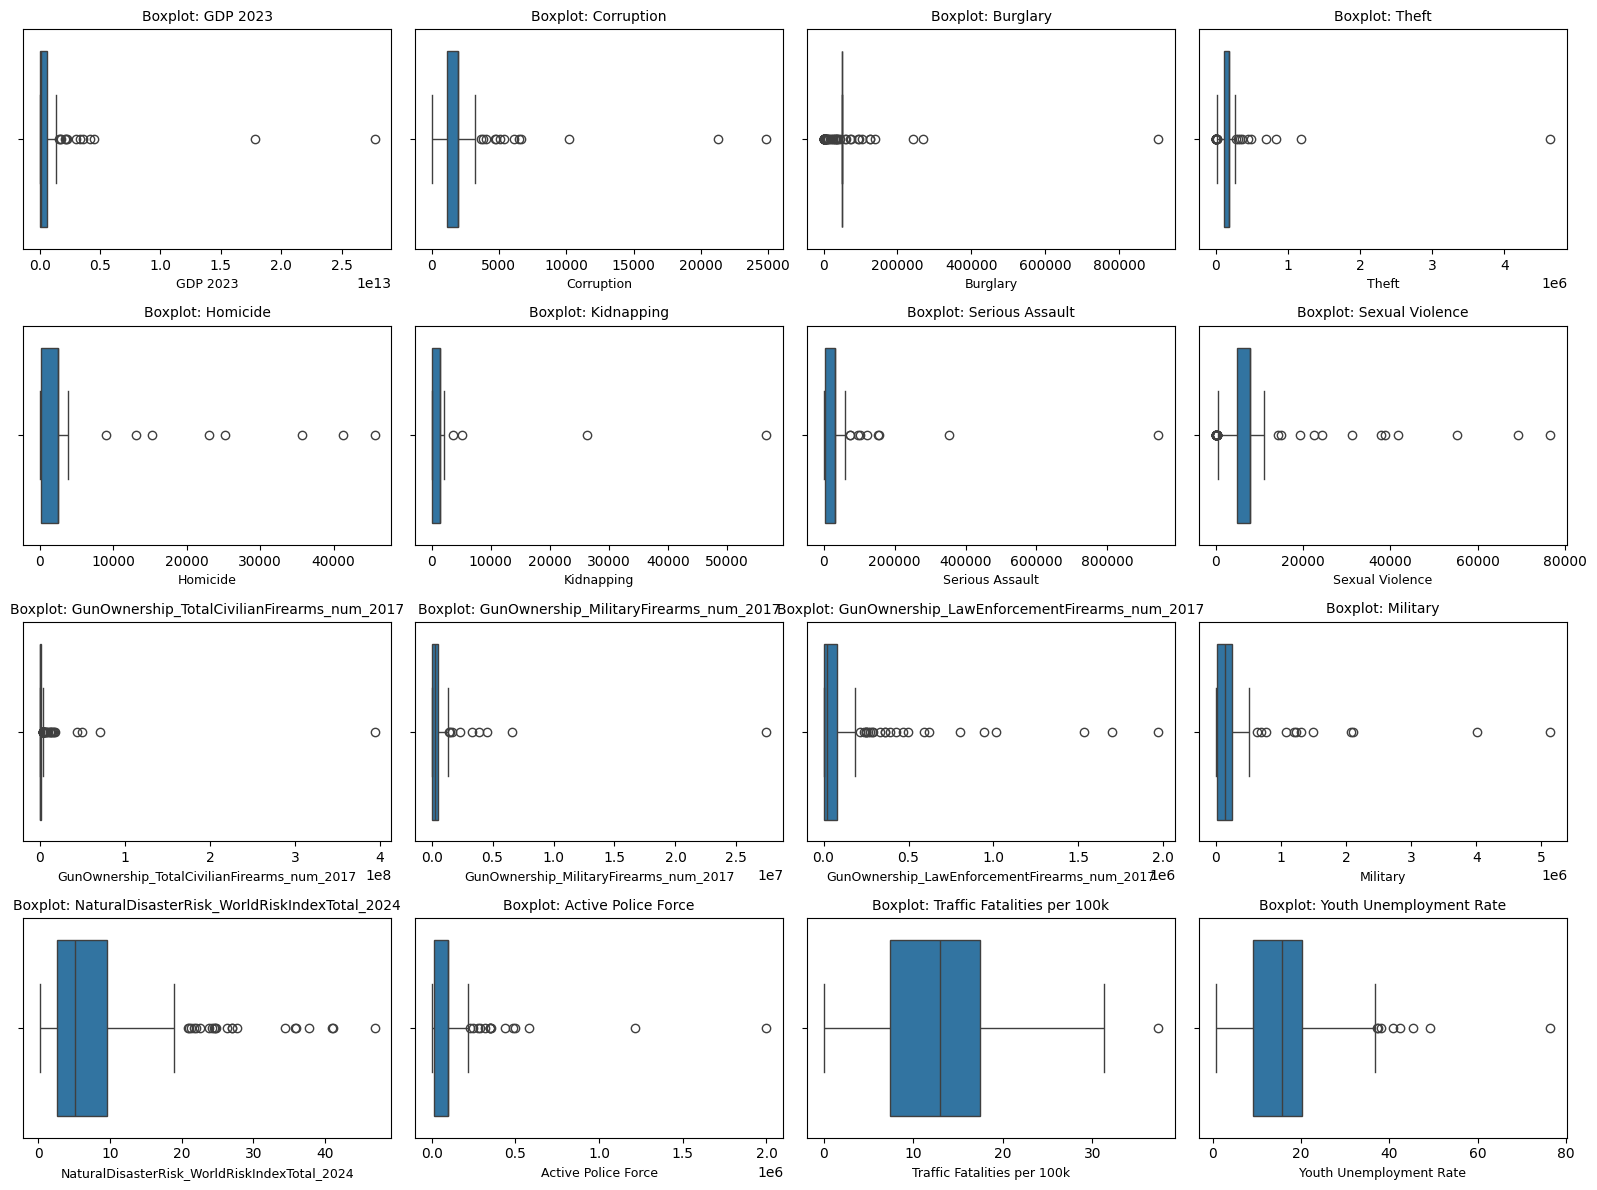

In [613]:


print(merged_df.columns.tolist())

columns = ['GDP 2023', 'Corruption', 'Burglary', 'Theft', 'Homicide', 'Kidnapping', 'Serious Assault', 'Sexual Violence', 'GunOwnership_TotalCivilianFirearms_num_2017', 'GunOwnership_MilitaryFirearms_num_2017', 'GunOwnership_LawEnforcementFirearms_num_2017', 'Military', 'NaturalDisasterRisk_WorldRiskIndexTotal_2024', 'Active Police Force', 'Traffic Fatalities per 100k', 'Youth Unemployment Rate']


plt.figure(figsize=(16, 12))

for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=merged_df[column])
    plt.title(f"Boxplot: {column}", fontsize=10) 
    plt.xlabel(column, fontsize=9)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.tight_layout() 
plt.show()


#### Handling Outliers

In [614]:
def handleOutliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with mean
    column_mean = df[column].mean()
    df[column] = df[column].apply(lambda x: column_mean if x < lower_bound or x > upper_bound else x)
    return df

for column in columns:
    merged_df = handleOutliers(merged_df, column)

    
merged_df.to_csv("country_safety_data.csv", index=False)
merged_df.head()


,Country,GDP 2023,Corruption,Burglary,Theft,Homicide,Kidnapping,Serious Assault,Sexual Violence,GunOwnership_TotalCivilianFirearms_num_2017,GunOwnership_MilitaryFirearms_num_2017,GunOwnership_LawEnforcementFirearms_num_2017,Military,NaturalDisasterRisk_WorldRiskIndexTotal_2024,Active Police Force,Traffic Fatalities per 100k,Youth Unemployment Rate
0,Afghanistan,1.723305e+10,1999.191176,50125.595238,181453.848485,1613.000000,1415.965945,31491.712534,7791.105485,4.352043e+06,331170.000000,101581.548387,495000.000000,4.12000,96902.100372,24.100000,18.100000
4,Albania,2.354718e+10,977.000000,50125.595238,181453.848485,66.000000,4.000000,163.000000,7791.105485,3.500000e+05,21750.000000,19000.000000,8000.000000,6.24000,9900.000000,10.800000,28.200000
5,Algeria,2.476260e+11,1579.000000,50125.595238,181453.848485,695.000000,239.000000,10032.000000,1812.000000,8.770000e+05,637720.000000,101581.548387,467200.000000,9.64000,160000.000000,18.300000,30.800000
6,American Samoa,5.860801e+11,1999.191176,50125.595238,181453.848485,2537.462046,1415.965945,31491.712534,7791.105485,4.000000e+02,555172.337838,90.000000,248620.288591,8.26655,96902.100372,13.053488,15.939306
9,Angola,8.482465e+10,1999.191176,50125.595238,181453.848485,2537.462046,1415.965945,31491.712534,7791.105485,2.982000e+06,203300.000000,60000.000000,117000.000000,10.42000,96902.100372,15.000000,28.200000


##### Visualization of outliers after cleaning.

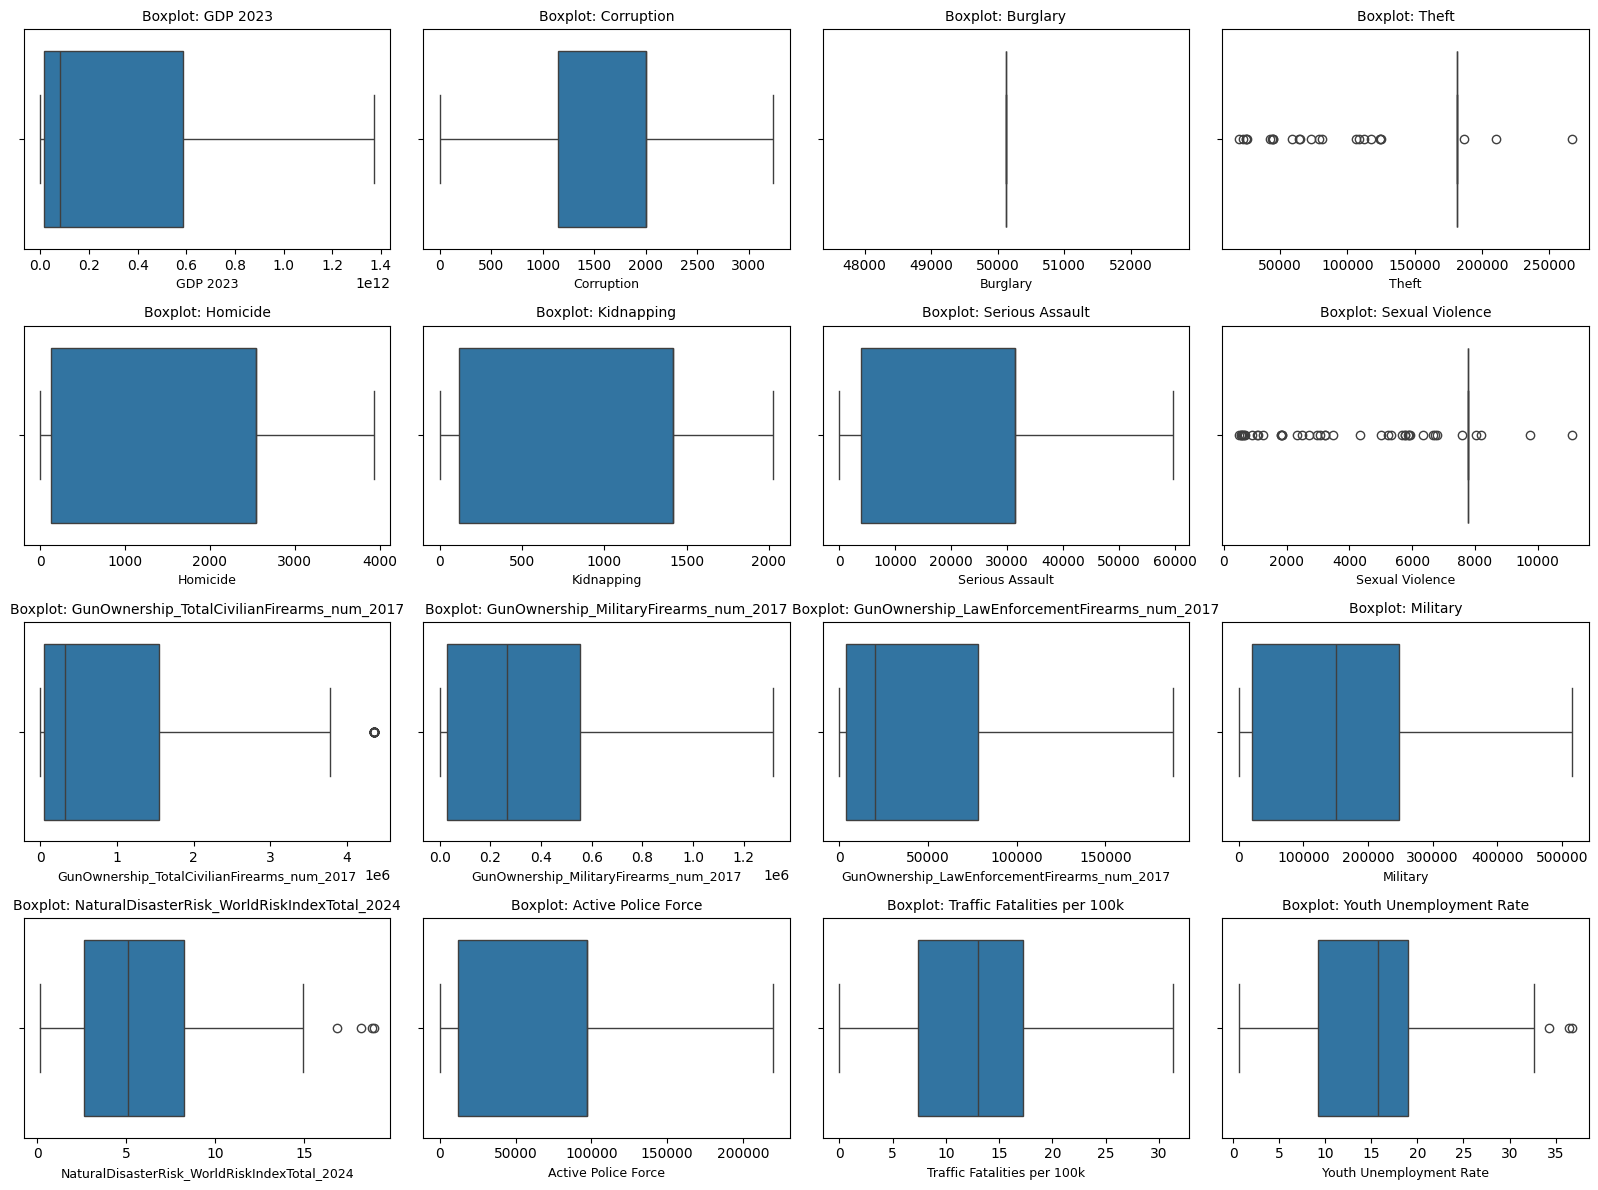

In [615]:
plt.figure(figsize=(16, 12))

for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=merged_df[column])
    plt.title(f"Boxplot: {column}", fontsize=10) 
    plt.xlabel(column, fontsize=9)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.tight_layout() 
plt.show()


## Multivariate Analysis

#### View Correlation Matrix


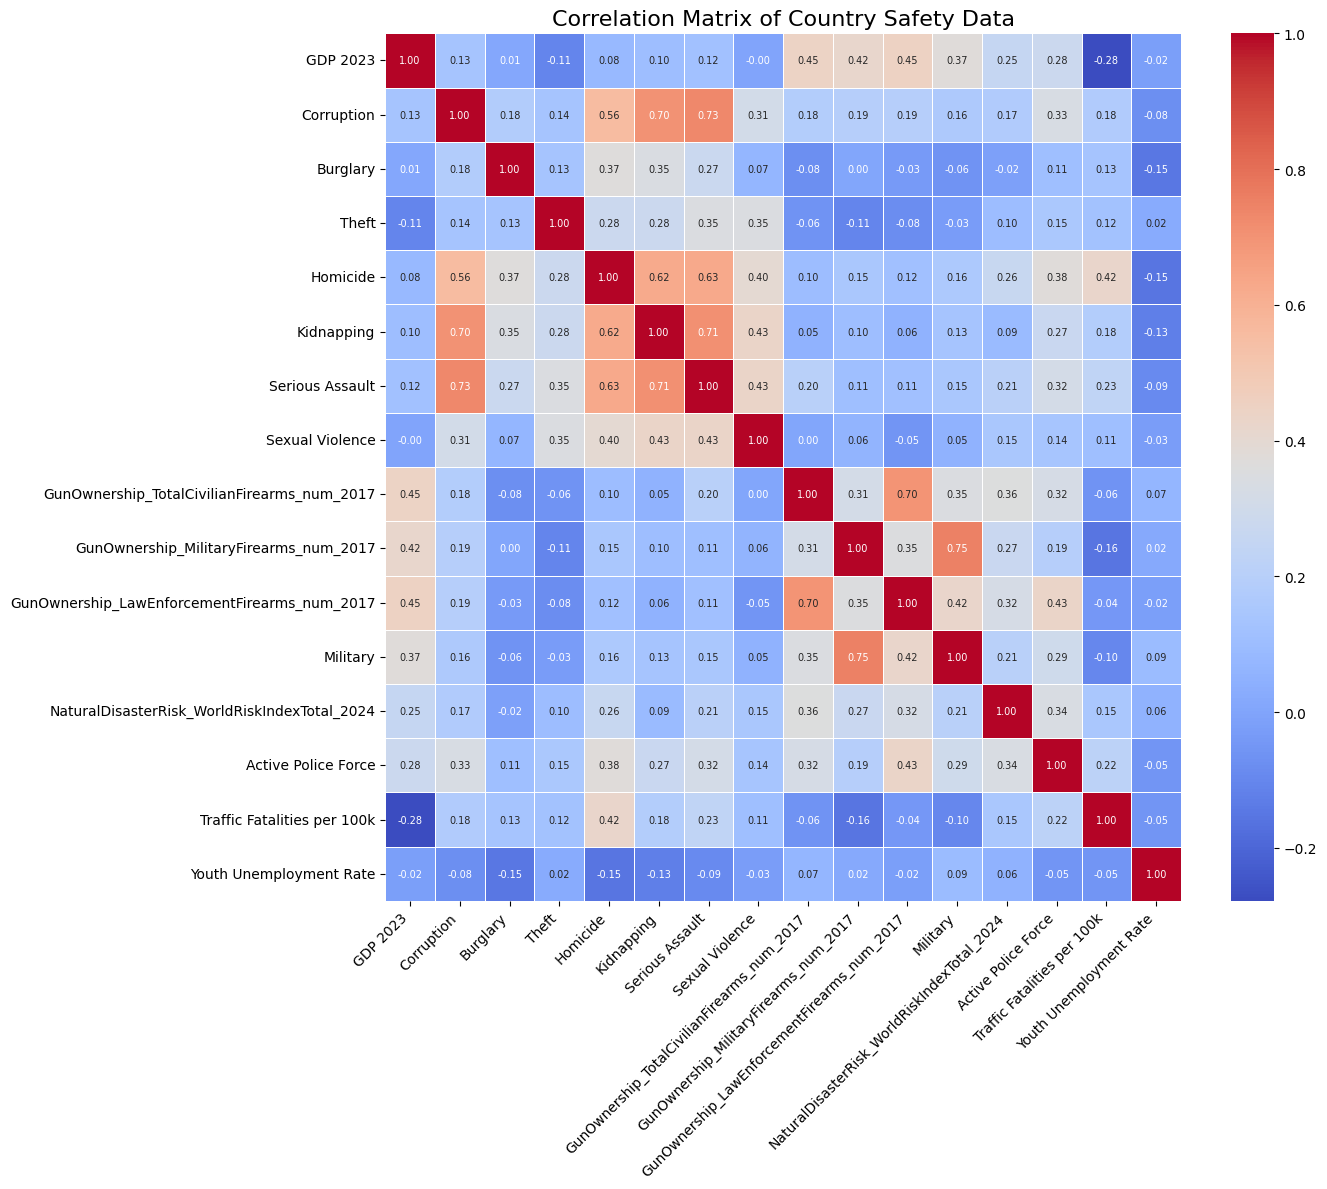

In [616]:
df = pd.read_csv("country_safety_data.csv")

corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 7}
)

plt.title("Correlation Matrix of Country Safety Data", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  
plt.show()

            

##### Scatter plots of columns with a correlation > 0.45

AI Used to dynamically generate scatter plots for correlations > 0.45

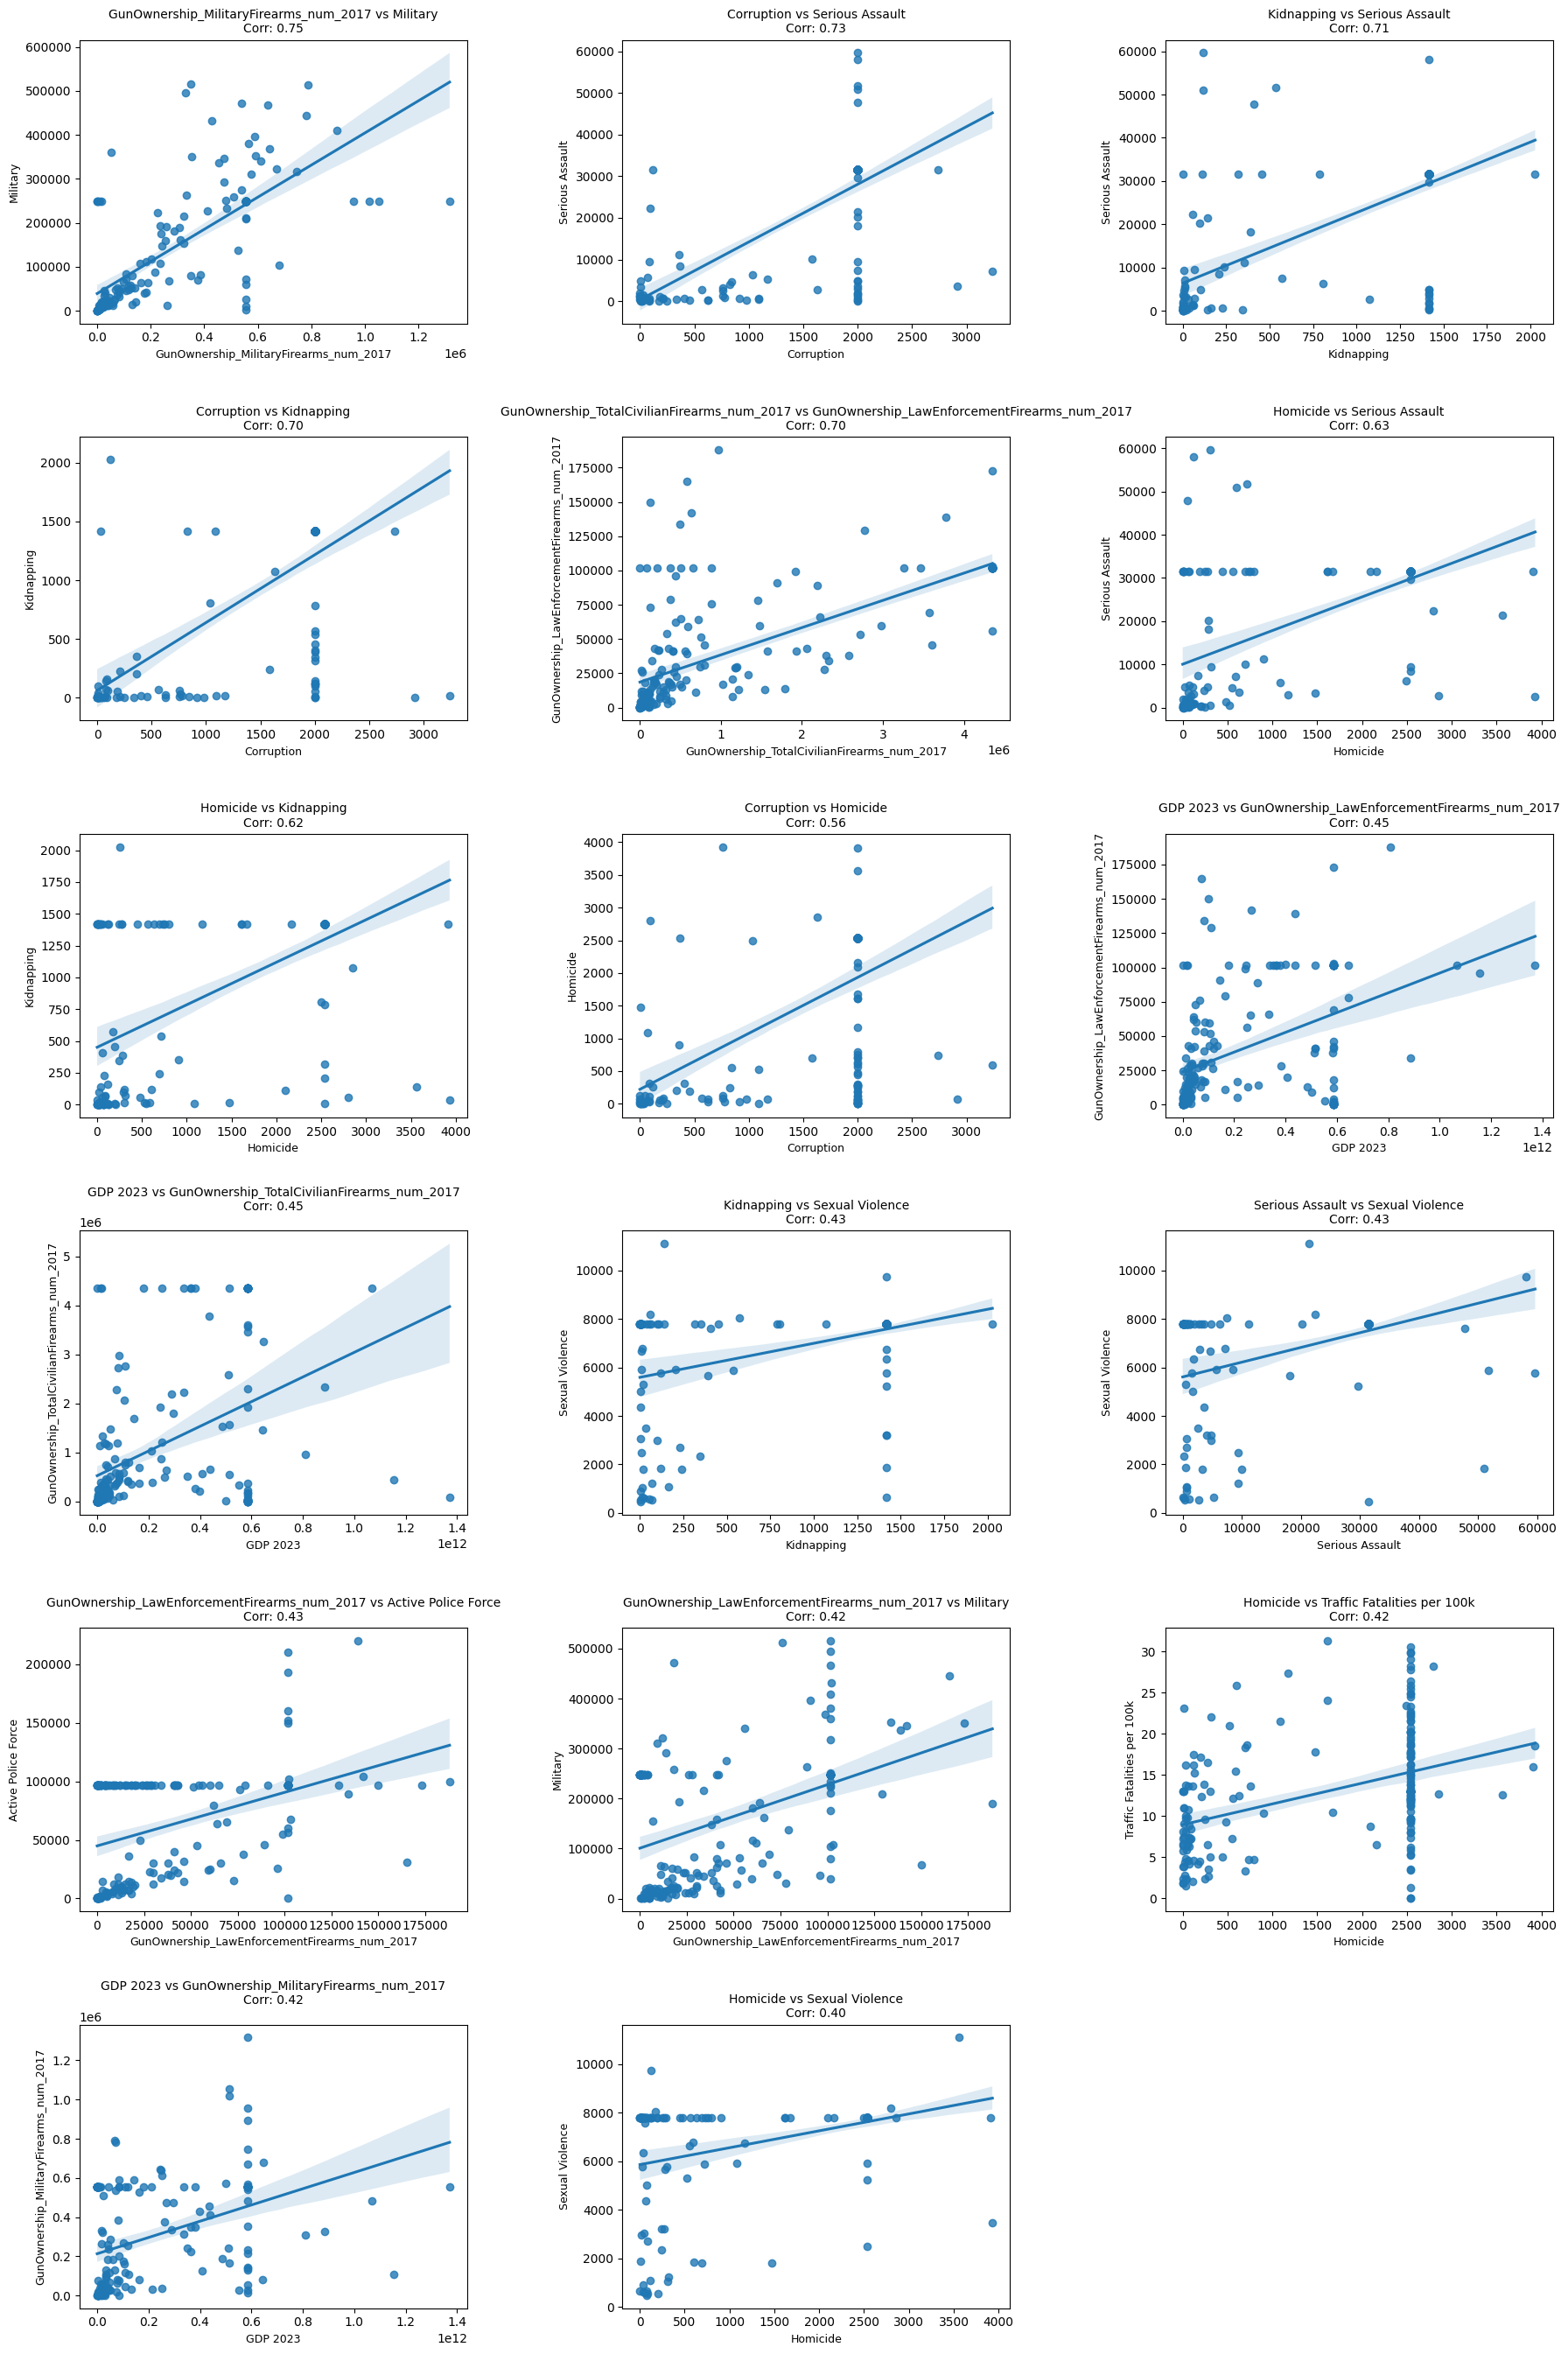

In [617]:
# Get all pairs of columns where correlation > 0.45 (excluding self-pairs)
threshold = 0.40
plotted_pairs = []

for col1, col2 in combinations(corr.columns, 2):
    corr_value = corr.loc[col1, col2]
    if corr_value > threshold:
        plotted_pairs.append((col1, col2, corr_value))

# Sort by correlation strength
plotted_pairs.sort(key=lambda x: x[2], reverse=True)

# Plot
n = len(plotted_pairs)
cols = 3
rows = (n // cols) + int(n % cols > 0)

plt.figure(figsize=(6 * cols, 4.5 * rows))

for i, (x_col, y_col, corr_val) in enumerate(plotted_pairs, 1):
    plt.subplot(rows, cols, i)
    sns.regplot(data=df, x=x_col, y=y_col)
    plt.title(f"{x_col} vs {y_col}\nCorr: {corr_val:.2f}", fontsize=10)
    plt.xlabel(x_col, fontsize=9)
    plt.ylabel(y_col, fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()



## Normalizing and Scaling

In [618]:
from sklearn.preprocessing import StandardScaler

df_features = df.drop(columns=["Country"])
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df_features)
scaled_df = pd.DataFrame(scaled_features, columns=df_features.columns)
scaled_df["Country"] = df["Country"].values

scaled_df.to_csv("scaled_country_safety_data.csv", index=False)
scaled_df.head()

,GDP 2023,Corruption,Burglary,Theft,Homicide,Kidnapping,Serious Assault,Sexual Violence,GunOwnership_TotalCivilianFirearms_num_2017,GunOwnership_MilitaryFirearms_num_2017,GunOwnership_LawEnforcementFirearms_num_2017,Military,NaturalDisasterRisk_WorldRiskIndexTotal_2024,Active Police Force,Traffic Fatalities per 100k,Youth Unemployment Rate,Country
0,-0.799377,0.540223,7.275958e-12,0.313055,0.029778,0.696571,0.631735,0.404584,2.079365,0.073279,1.373031,2.588191,-0.457921,0.712123,1.595783,0.435067,Afghanistan
1,-0.776431,-0.792856,0.000000e+00,0.313055,-1.287979,-1.547800,-1.527018,0.404584,-0.497263,-1.066443,-0.495443,-1.094241,0.067661,-1.146484,-0.304175,1.734330,Albania
2,0.037903,-0.007765,7.275958e-12,0.313055,-0.752188,-1.174259,-0.846980,-2.520735,-0.157966,1.202430,1.373031,2.377982,0.910576,2.060070,0.767230,2.068794,Algeria
3,1.267892,0.540223,7.275958e-12,0.313055,0.817247,0.696571,0.631735,0.404584,-0.722345,0.898373,-0.923297,0.725200,0.570076,0.712123,0.017745,0.157115,American Samoa
4,-0.553740,0.540223,7.275958e-12,0.313055,0.817247,0.696571,0.631735,0.404584,1.197293,-0.397719,0.432215,-0.270041,1.103951,0.712123,0.295812,1.734330,Angola


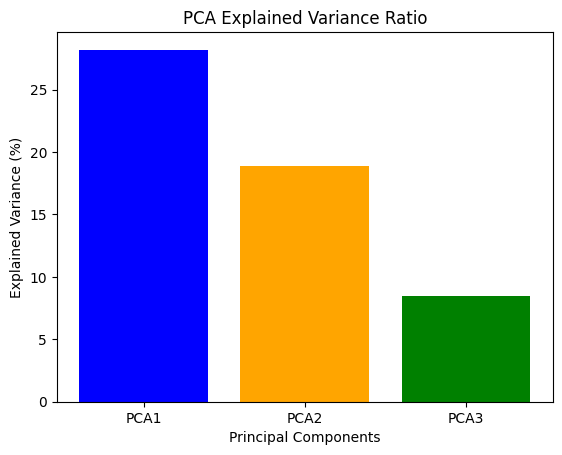

In [619]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df.drop(columns=["Country"]))

pca_df = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2", "PCA3"])
pca_df["Country"] = scaled_df["Country"].values


labels = ['PCA1', 'PCA2', 'PCA3']
plt.bar(x=labels, height=pca.explained_variance_ratio_ * 100, color=['blue', 'orange', 'green'])
plt.title('PCA Explained Variance Ratio')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.show()


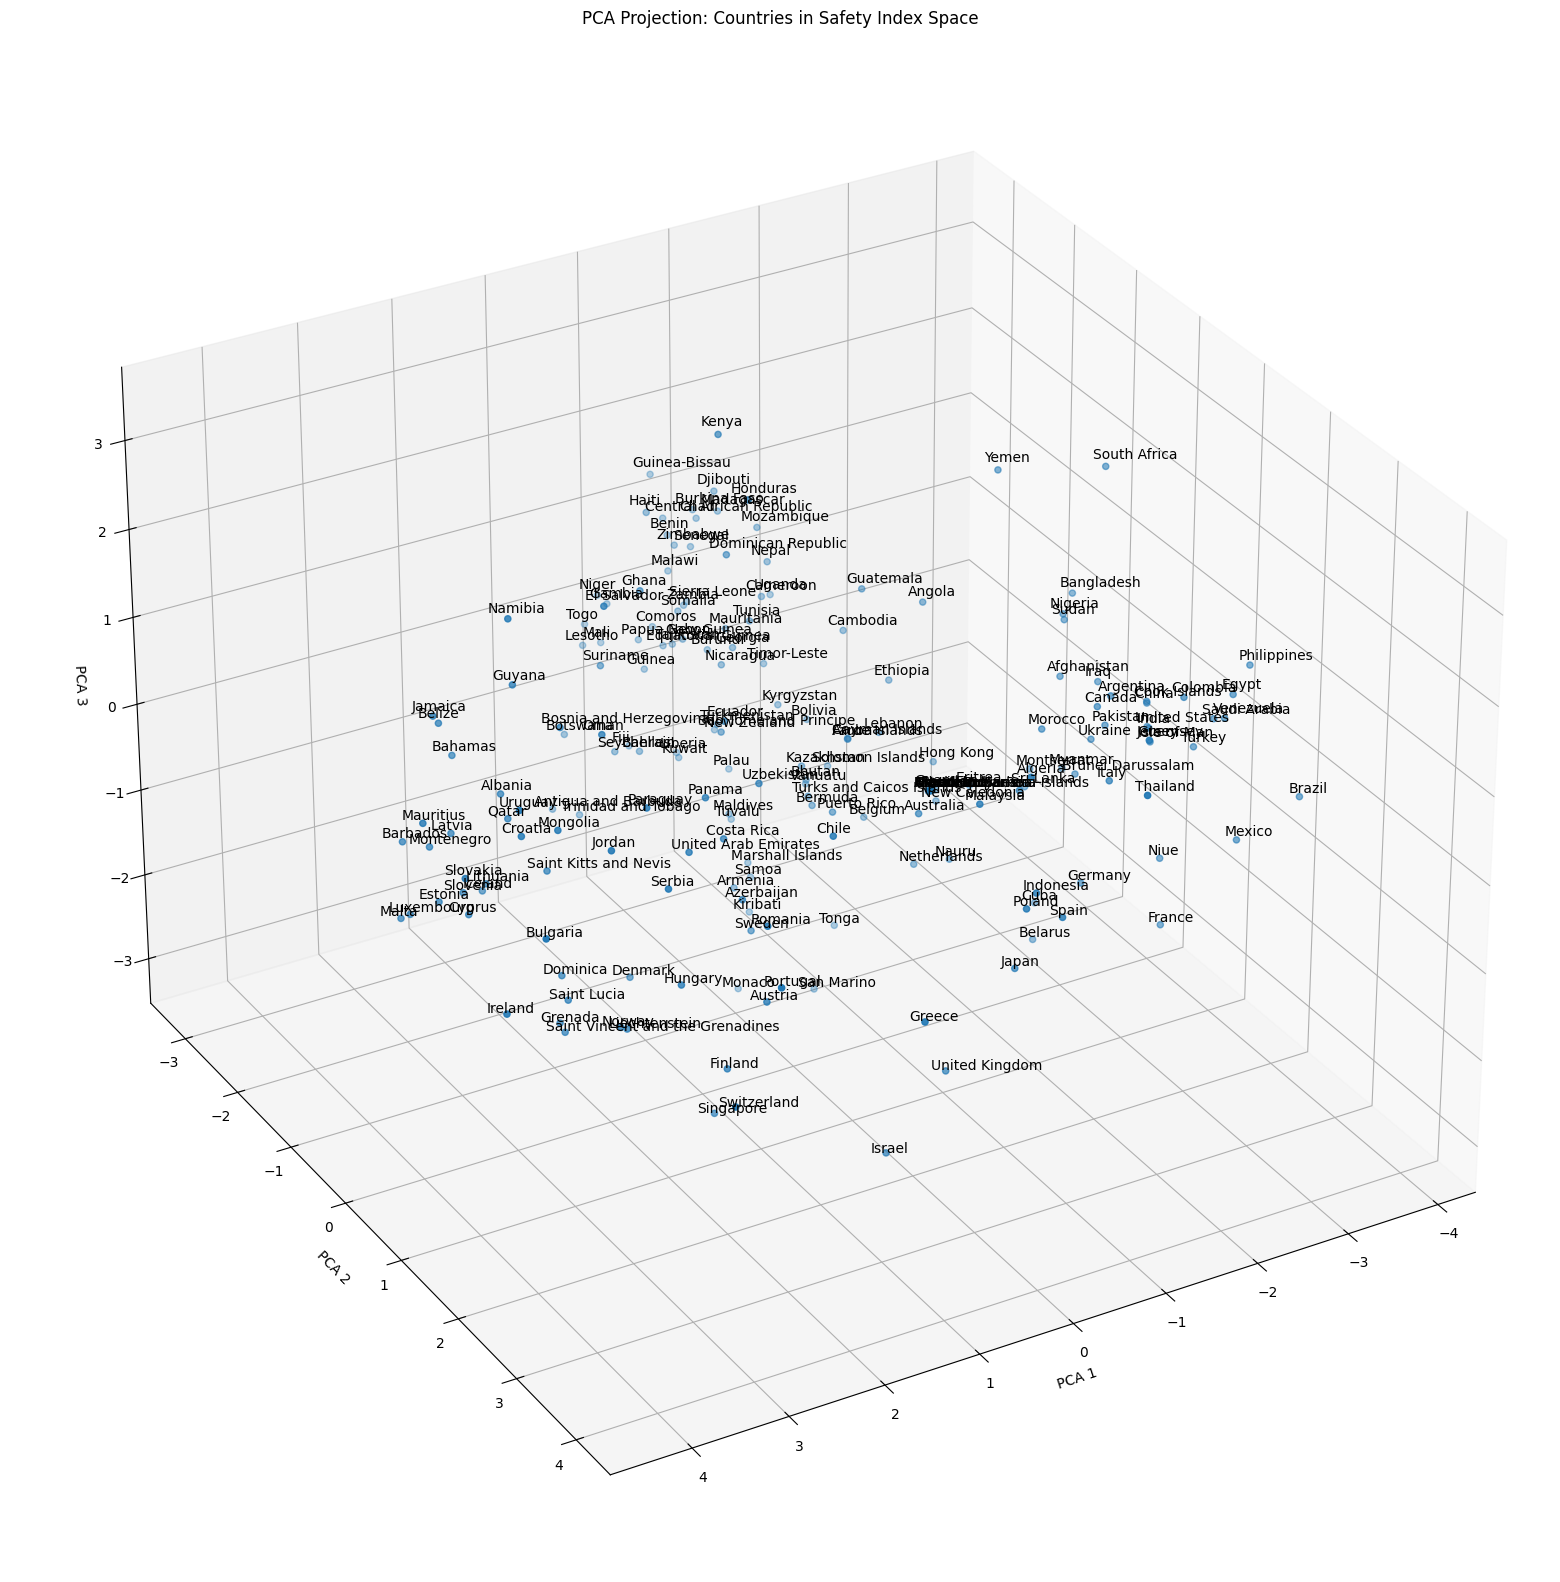

In [620]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'])


for i, txt in enumerate(pca_df['Country']):
    ax.text(pca_df['PCA1'][i] + 0.5, 
            pca_df['PCA2'][i] + 0.5, 
            pca_df['PCA3'][i] + 0.5, 
            txt, fontsize=10)

ax.view_init(elev=30, azim=60)

ax.set_title('PCA Projection: Countries in Safety Index Space')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

##### Interactive Graph For Better Analysis

Hover over point to see the country

In [621]:
fig = px.scatter_3d(
    pca_df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    hover_name='Country', 
    color_discrete_sequence=['blue'] 
)

fig.update_layout(
    title="PCA Projection: Countries in Safety Index Space",
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

## Clustering

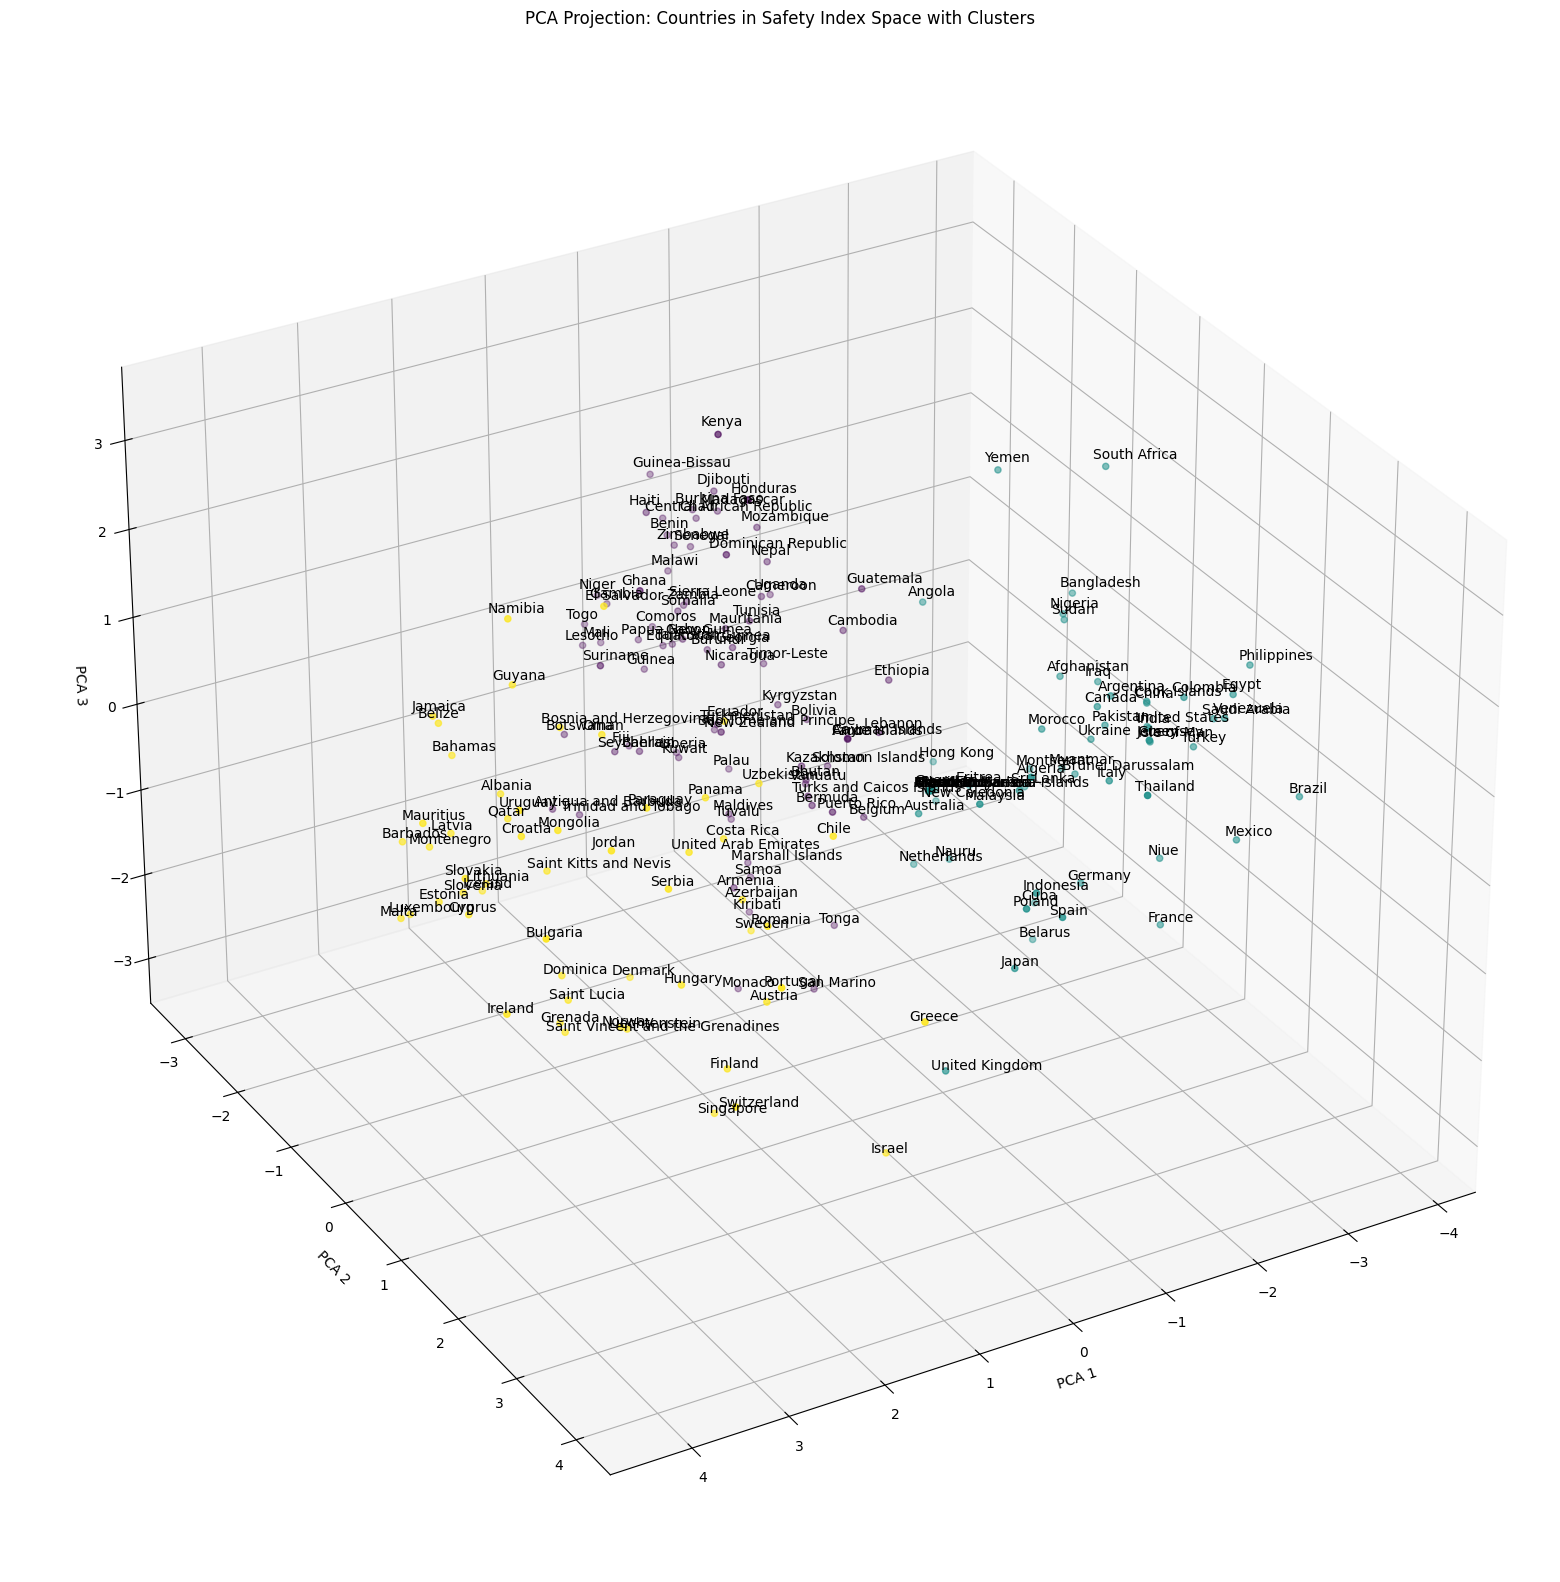

In [622]:
km = KMeans(n_clusters=3, n_init='auto')
pca_df['Cluster'] = km.fit_predict(pca_df[['PCA1', 'PCA2', 'PCA3']])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['Cluster'], cmap='viridis')

for i, txt in enumerate(pca_df['Country']):
    ax.text(pca_df['PCA1'][i] + 0.5, 
            pca_df['PCA2'][i] + 0.5, 
            pca_df['PCA3'][i] + 0.5, 
            txt, fontsize=10)
    
ax.view_init(elev=30, azim=60)
ax.set_title('PCA Projection: Countries in Safety Index Space with Clusters')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

##### Interactive Graph For Better Visualization Hover over the points

In [623]:


fig = px.scatter_3d(
    pca_df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_name='Country', 
    color_continuous_scale=px.colors.sequential.Viridis,
    title="KMeans Clustering of PCA Projection: Countries in Safety Index Space"
)

fig.update_layout(
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


## Weighting and Aggregation

#### Deciding my weights from PCA

AI GENERATED TO DETERMINE PCA LOADINGS

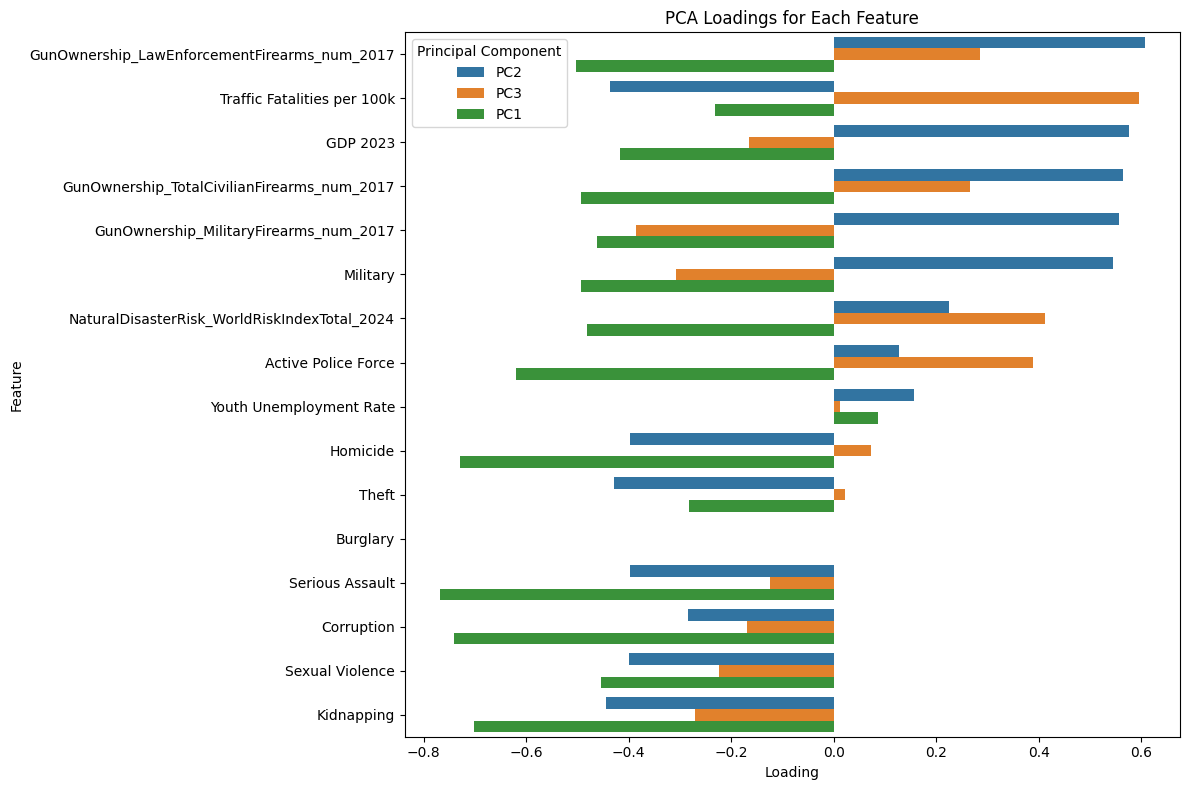

In [624]:
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
pca_loadings_df = pd.DataFrame(pca_loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_features.columns)
pca_loadings_df = pca_loadings_df.reset_index()
pca_loadings_df.columns = ['Feature'] + [f'PC{i+1}' for i in range(pca.n_components_)]
pca_loadings_df = pca_loadings_df.melt(id_vars='Feature', var_name='Principal Component', value_name='Loading')
pca_loadings_df = pca_loadings_df.sort_values(by='Loading', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=pca_loadings_df, x='Loading', y='Feature', hue='Principal Component', dodge=True)
plt.title('PCA Loadings for Each Feature')
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.legend(title='Principal Component')
plt.tight_layout()
plt.show()

In [625]:
pca_loadings_matrix = pca.components_.T * np.sqrt(pca.explained_variance_)
pca_loadings_df_full = pd.DataFrame(
    pca_loadings_matrix,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_features.columns
)

pc1_abs = pca_loadings_df_full['PC1'].abs()
weights = pc1_abs / pc1_abs.sum()



In [626]:
composite_scores = scaled_df[weights.index] @ weights
composite_scores_df = pd.DataFrame(composite_scores, columns=['Composite Score'])
composite_scores_df['Country'] = scaled_df['Country'].values
composite_scores_df = composite_scores_df.sort_values(by='Composite Score', ascending=True)

print(composite_scores_df.reset_index(drop=True))

     Composite Score       Country
0          -1.185701       Ireland
1          -1.142026     Mauritius
2          -1.136125         Malta
3          -1.131305      Slovakia
4          -1.124938      Bulgaria
..               ...           ...
191         0.908913     Venezuela
192         0.926945  Saudi Arabia
193         0.958850         Egypt
194         1.015770   Philippines
195         1.068510        Brazil

[196 rows x 2 columns]


#### Safest Countries

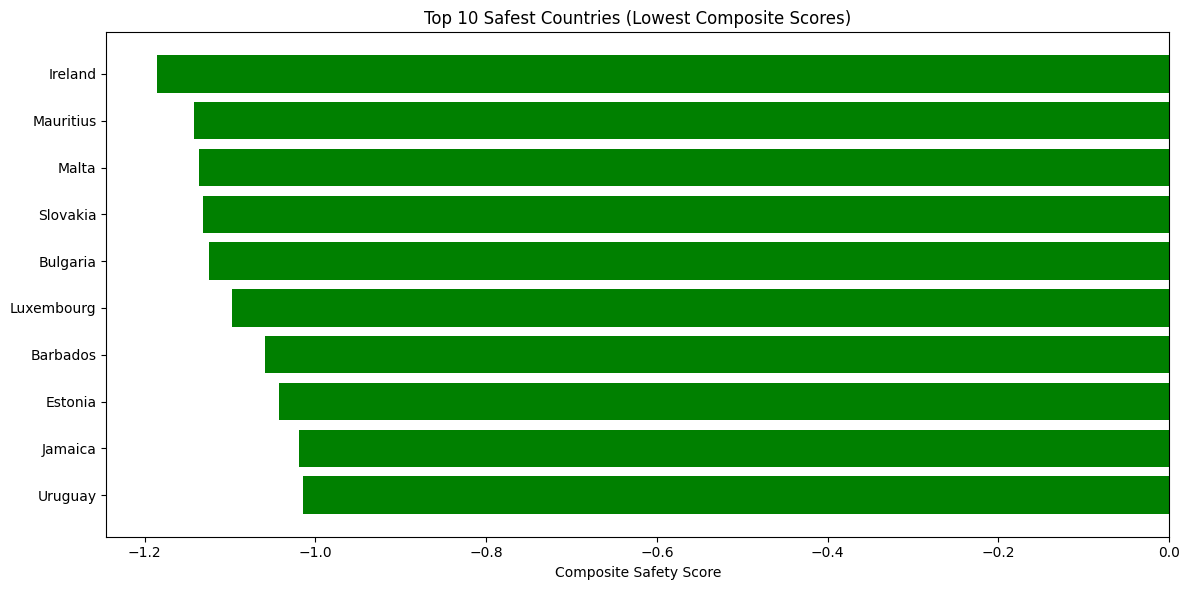

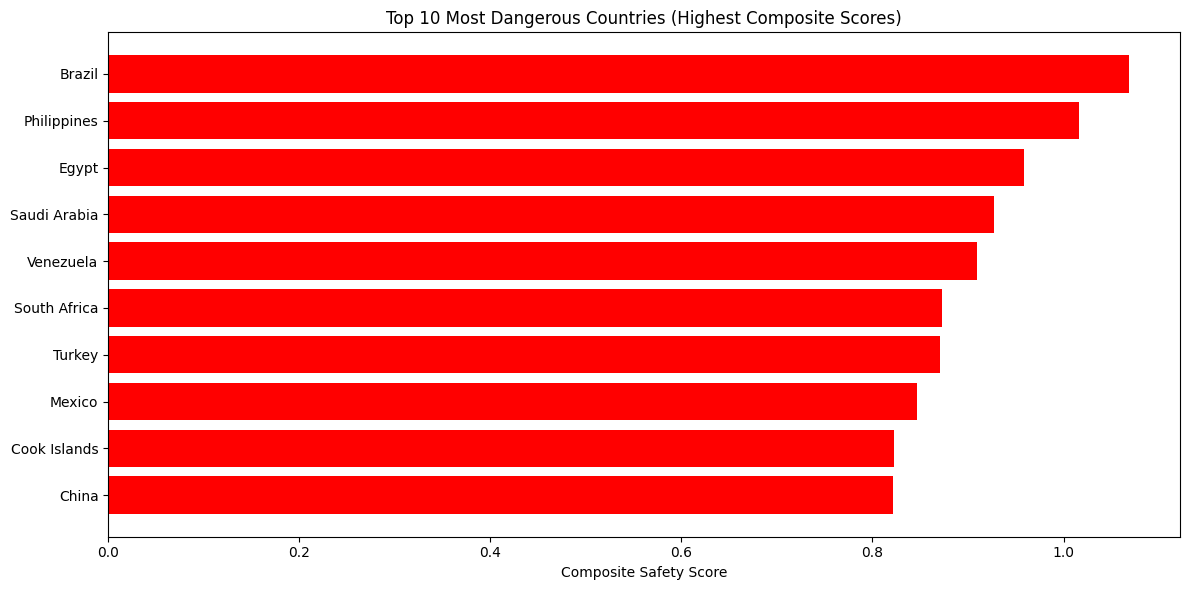

In [627]:
# Sort scores in ascending order: lower = safer
composite_scores_sorted = composite_scores_df.sort_values(by='Composite Score', ascending=True)

top_10_safest = composite_scores_sorted.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10_safest['Country'], top_10_safest['Composite Score'], color='green')
plt.xlabel('Composite Safety Score')
plt.title('Top 10 Safest Countries (Lowest Composite Scores)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_10_dangerous = composite_scores_sorted.tail(10).sort_values(by='Composite Score', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(top_10_dangerous['Country'], top_10_dangerous['Composite Score'], color='red')
plt.xlabel('Composite Safety Score')
plt.title('Top 10 Most Dangerous Countries (Highest Composite Scores)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Visualisation 

#### I created a folder called visuals that contains a html page, this html page will display a world map representation of my composite scores

In [628]:
composite_scores_list = [
    {"country": row["Country"], "score": row["Composite Score"]}
    for _, row in composite_scores_df.iterrows()
]

with open("composite_scores.json", "w") as f:
    json.dump(composite_scores_list, f, indent=4)